In [9]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [10]:
#from keras
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.preprocessing import image
from keras.models import Model, model_from_json
from keras.layers import Input
#from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# other imports
import numpy as np
import glob
import cv2
import h5py
import os
import json
import datetime
import time
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
# organize imports
from __future__ import print_function

In [11]:
with open('conf/conf.json') as f:
    config = json.load(f)

In [12]:
model_name    = config["model"]
weights       = config["weights"]
include_top   = config["include_top"]
train_path    = config["train_path"]
features_path = config["features_path"]
labels_path   = config["labels_path"]
test_size     = config["test_size"]
results       = config["results"]
model_path    = config["model_path"]

In [13]:
base_model = MobileNet(include_top=include_top, weights=weights, input_tensor=Input(shape=(224,224,3)), input_shape=(224,224,3))
model = Model(base_model.input,base_model.get_layer('conv_pw_13_relu').output)
image_size = (224, 224)

In [14]:
train_labels = os.listdir(train_path)

# encode the labels
print ("[INFO] encoding labels...")
le = LabelEncoder()
le.fit([tl for tl in train_labels])

[INFO] encoding labels...


LabelEncoder()

In [15]:
# variables to hold features and labels
features = []
labels   = []

# loop over all the labels in the folder
count = 1
for i, label in enumerate(train_labels):
  cur_path = train_path + "/" + label
  count = 1
  for image_path in glob.glob(cur_path + "/*.jpeg"):
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = model.predict(x)
    flat = feature.flatten()
    features.append(flat)
    labels.append(label)
    print ("[INFO] processed - " + str(count))
    count += 1
  print ("[INFO] completed label - " + label)

[INFO] processed - 1
[INFO] processed - 2
[INFO] processed - 3
[INFO] processed - 4
[INFO] processed - 5
[INFO] processed - 6
[INFO] processed - 7
[INFO] processed - 8
[INFO] processed - 9
[INFO] processed - 10
[INFO] processed - 11
[INFO] processed - 12
[INFO] processed - 13
[INFO] processed - 14
[INFO] processed - 15
[INFO] processed - 16
[INFO] processed - 17
[INFO] processed - 18
[INFO] processed - 19
[INFO] processed - 20
[INFO] processed - 21
[INFO] processed - 22
[INFO] processed - 23
[INFO] processed - 24
[INFO] processed - 25
[INFO] processed - 26
[INFO] processed - 27
[INFO] processed - 28
[INFO] processed - 29
[INFO] processed - 30
[INFO] processed - 31
[INFO] processed - 32
[INFO] processed - 33
[INFO] processed - 34
[INFO] processed - 35
[INFO] processed - 36
[INFO] processed - 37
[INFO] processed - 38
[INFO] processed - 39
[INFO] processed - 40
[INFO] processed - 41
[INFO] processed - 42
[INFO] processed - 43
[INFO] processed - 44
[INFO] processed - 45
[INFO] processed - 

[INFO] processed - 363
[INFO] processed - 364
[INFO] processed - 365
[INFO] processed - 366
[INFO] processed - 367
[INFO] processed - 368
[INFO] processed - 369
[INFO] processed - 370
[INFO] processed - 371
[INFO] processed - 372
[INFO] processed - 373
[INFO] processed - 374
[INFO] processed - 375
[INFO] processed - 376
[INFO] processed - 377
[INFO] processed - 378
[INFO] processed - 379
[INFO] processed - 380
[INFO] processed - 381
[INFO] processed - 382
[INFO] processed - 383
[INFO] processed - 384
[INFO] processed - 385
[INFO] processed - 386
[INFO] processed - 387
[INFO] processed - 388
[INFO] processed - 389
[INFO] processed - 390
[INFO] processed - 391
[INFO] processed - 392
[INFO] processed - 393
[INFO] processed - 394
[INFO] processed - 395
[INFO] processed - 396
[INFO] processed - 397
[INFO] processed - 398
[INFO] processed - 399
[INFO] processed - 400
[INFO] processed - 401
[INFO] processed - 402
[INFO] processed - 403
[INFO] processed - 404
[INFO] processed - 405
[INFO] proc

[INFO] processed - 721
[INFO] processed - 722
[INFO] processed - 723
[INFO] processed - 724
[INFO] processed - 725
[INFO] processed - 726
[INFO] processed - 727
[INFO] processed - 728
[INFO] processed - 729
[INFO] processed - 730
[INFO] processed - 731
[INFO] processed - 732
[INFO] processed - 733
[INFO] processed - 734
[INFO] processed - 735
[INFO] processed - 736
[INFO] processed - 737
[INFO] processed - 738
[INFO] processed - 739
[INFO] processed - 740
[INFO] processed - 741
[INFO] processed - 742
[INFO] processed - 743
[INFO] processed - 744
[INFO] processed - 745
[INFO] processed - 746
[INFO] processed - 747
[INFO] processed - 748
[INFO] processed - 749
[INFO] processed - 750
[INFO] processed - 751
[INFO] processed - 752
[INFO] processed - 753
[INFO] processed - 754
[INFO] processed - 755
[INFO] processed - 756
[INFO] processed - 757
[INFO] processed - 758
[INFO] processed - 759
[INFO] processed - 760
[INFO] processed - 761
[INFO] processed - 762
[INFO] processed - 763
[INFO] proc

[INFO] processed - 1075
[INFO] processed - 1076
[INFO] processed - 1077
[INFO] processed - 1078
[INFO] processed - 1079
[INFO] processed - 1080
[INFO] processed - 1081
[INFO] processed - 1082
[INFO] processed - 1083
[INFO] processed - 1084
[INFO] processed - 1085
[INFO] processed - 1086
[INFO] processed - 1087
[INFO] processed - 1088
[INFO] processed - 1089
[INFO] processed - 1090
[INFO] processed - 1091
[INFO] processed - 1092
[INFO] processed - 1093
[INFO] processed - 1094
[INFO] processed - 1095
[INFO] processed - 1096
[INFO] processed - 1097
[INFO] processed - 1098
[INFO] processed - 1099
[INFO] processed - 1100
[INFO] processed - 1101
[INFO] processed - 1102
[INFO] processed - 1103
[INFO] processed - 1104
[INFO] processed - 1105
[INFO] processed - 1106
[INFO] processed - 1107
[INFO] processed - 1108
[INFO] processed - 1109
[INFO] processed - 1110
[INFO] processed - 1111
[INFO] processed - 1112
[INFO] processed - 1113
[INFO] processed - 1114
[INFO] processed - 1115
[INFO] processed

[INFO] processed - 1418
[INFO] processed - 1419
[INFO] processed - 1420
[INFO] processed - 1421
[INFO] processed - 1422
[INFO] processed - 1423
[INFO] processed - 1424
[INFO] processed - 1425
[INFO] processed - 1426
[INFO] processed - 1427
[INFO] processed - 1428
[INFO] processed - 1429
[INFO] processed - 1430
[INFO] processed - 1431
[INFO] processed - 1432
[INFO] processed - 1433
[INFO] processed - 1434
[INFO] processed - 1435
[INFO] processed - 1436
[INFO] processed - 1437
[INFO] processed - 1438
[INFO] processed - 1439
[INFO] processed - 1440
[INFO] processed - 1441
[INFO] processed - 1442
[INFO] processed - 1443
[INFO] processed - 1444
[INFO] processed - 1445
[INFO] processed - 1446
[INFO] processed - 1447
[INFO] processed - 1448
[INFO] processed - 1449
[INFO] processed - 1450
[INFO] processed - 1451
[INFO] processed - 1452
[INFO] processed - 1453
[INFO] processed - 1454
[INFO] processed - 1455
[INFO] processed - 1456
[INFO] processed - 1457
[INFO] processed - 1458
[INFO] processed

[INFO] processed - 1760
[INFO] processed - 1761
[INFO] processed - 1762
[INFO] processed - 1763
[INFO] processed - 1764
[INFO] processed - 1765
[INFO] processed - 1766
[INFO] processed - 1767
[INFO] processed - 1768
[INFO] processed - 1769
[INFO] processed - 1770
[INFO] processed - 1771
[INFO] processed - 1772
[INFO] processed - 1773
[INFO] processed - 1774
[INFO] processed - 1775
[INFO] processed - 1776
[INFO] processed - 1777
[INFO] processed - 1778
[INFO] processed - 1779
[INFO] processed - 1780
[INFO] processed - 1781
[INFO] processed - 1782
[INFO] processed - 1783
[INFO] processed - 1784
[INFO] processed - 1785
[INFO] processed - 1786
[INFO] processed - 1787
[INFO] processed - 1788
[INFO] processed - 1789
[INFO] processed - 1790
[INFO] processed - 1791
[INFO] processed - 1792
[INFO] processed - 1793
[INFO] processed - 1794
[INFO] processed - 1795
[INFO] processed - 1796
[INFO] processed - 1797
[INFO] processed - 1798
[INFO] processed - 1799
[INFO] processed - 1800
[INFO] processed

[INFO] processed - 2102
[INFO] processed - 2103
[INFO] processed - 2104
[INFO] processed - 2105
[INFO] processed - 2106
[INFO] processed - 2107
[INFO] processed - 2108
[INFO] processed - 2109
[INFO] processed - 2110
[INFO] processed - 2111
[INFO] processed - 2112
[INFO] processed - 2113
[INFO] processed - 2114
[INFO] processed - 2115
[INFO] processed - 2116
[INFO] processed - 2117
[INFO] processed - 2118
[INFO] processed - 2119
[INFO] processed - 2120
[INFO] processed - 2121
[INFO] processed - 2122
[INFO] processed - 2123
[INFO] processed - 2124
[INFO] processed - 2125
[INFO] processed - 2126
[INFO] processed - 2127
[INFO] processed - 2128
[INFO] processed - 2129
[INFO] processed - 2130
[INFO] processed - 2131
[INFO] processed - 2132
[INFO] processed - 2133
[INFO] processed - 2134
[INFO] processed - 2135
[INFO] processed - 2136
[INFO] processed - 2137
[INFO] processed - 2138
[INFO] processed - 2139
[INFO] processed - 2140
[INFO] processed - 2141
[INFO] processed - 2142
[INFO] processed

[INFO] processed - 2445
[INFO] processed - 2446
[INFO] processed - 2447
[INFO] processed - 2448
[INFO] processed - 2449
[INFO] processed - 2450
[INFO] processed - 2451
[INFO] processed - 2452
[INFO] processed - 2453
[INFO] processed - 2454
[INFO] processed - 2455
[INFO] processed - 2456
[INFO] processed - 2457
[INFO] processed - 2458
[INFO] processed - 2459
[INFO] processed - 2460
[INFO] processed - 2461
[INFO] processed - 2462
[INFO] processed - 2463
[INFO] processed - 2464
[INFO] processed - 2465
[INFO] processed - 2466
[INFO] processed - 2467
[INFO] processed - 2468
[INFO] processed - 2469
[INFO] processed - 2470
[INFO] processed - 2471
[INFO] processed - 2472
[INFO] processed - 2473
[INFO] processed - 2474
[INFO] processed - 2475
[INFO] processed - 2476
[INFO] processed - 2477
[INFO] processed - 2478
[INFO] processed - 2479
[INFO] processed - 2480
[INFO] processed - 2481
[INFO] processed - 2482
[INFO] processed - 2483
[INFO] processed - 2484
[INFO] processed - 2485
[INFO] processed

[INFO] processed - 316
[INFO] processed - 317
[INFO] processed - 318
[INFO] processed - 319
[INFO] processed - 320
[INFO] processed - 321
[INFO] processed - 322
[INFO] processed - 323
[INFO] processed - 324
[INFO] processed - 325
[INFO] processed - 326
[INFO] processed - 327
[INFO] processed - 328
[INFO] processed - 329
[INFO] processed - 330
[INFO] processed - 331
[INFO] processed - 332
[INFO] processed - 333
[INFO] processed - 334
[INFO] processed - 335
[INFO] processed - 336
[INFO] processed - 337
[INFO] processed - 338
[INFO] processed - 339
[INFO] processed - 340
[INFO] processed - 341
[INFO] processed - 342
[INFO] processed - 343
[INFO] processed - 344
[INFO] processed - 345
[INFO] processed - 346
[INFO] processed - 347
[INFO] processed - 348
[INFO] processed - 349
[INFO] processed - 350
[INFO] processed - 351
[INFO] processed - 352
[INFO] processed - 353
[INFO] processed - 354
[INFO] processed - 355
[INFO] processed - 356
[INFO] processed - 357
[INFO] processed - 358
[INFO] proc

[INFO] processed - 673
[INFO] processed - 674
[INFO] processed - 675
[INFO] processed - 676
[INFO] processed - 677
[INFO] processed - 678
[INFO] processed - 679
[INFO] processed - 680
[INFO] processed - 681
[INFO] processed - 682
[INFO] processed - 683
[INFO] processed - 684
[INFO] processed - 685
[INFO] processed - 686
[INFO] processed - 687
[INFO] processed - 688
[INFO] processed - 689
[INFO] processed - 690
[INFO] processed - 691
[INFO] processed - 692
[INFO] processed - 693
[INFO] processed - 694
[INFO] processed - 695
[INFO] processed - 696
[INFO] processed - 697
[INFO] processed - 698
[INFO] processed - 699
[INFO] processed - 700
[INFO] processed - 701
[INFO] processed - 702
[INFO] processed - 703
[INFO] processed - 704
[INFO] processed - 705
[INFO] processed - 706
[INFO] processed - 707
[INFO] processed - 708
[INFO] processed - 709
[INFO] processed - 710
[INFO] processed - 711
[INFO] processed - 712
[INFO] processed - 713
[INFO] processed - 714
[INFO] processed - 715
[INFO] proc

[INFO] processed - 1029
[INFO] processed - 1030
[INFO] processed - 1031
[INFO] processed - 1032
[INFO] processed - 1033
[INFO] processed - 1034
[INFO] processed - 1035
[INFO] processed - 1036
[INFO] processed - 1037
[INFO] processed - 1038
[INFO] processed - 1039
[INFO] processed - 1040
[INFO] processed - 1041
[INFO] processed - 1042
[INFO] processed - 1043
[INFO] processed - 1044
[INFO] processed - 1045
[INFO] processed - 1046
[INFO] processed - 1047
[INFO] processed - 1048
[INFO] processed - 1049
[INFO] processed - 1050
[INFO] processed - 1051
[INFO] processed - 1052
[INFO] processed - 1053
[INFO] processed - 1054
[INFO] processed - 1055
[INFO] processed - 1056
[INFO] processed - 1057
[INFO] processed - 1058
[INFO] processed - 1059
[INFO] processed - 1060
[INFO] processed - 1061
[INFO] processed - 1062
[INFO] processed - 1063
[INFO] processed - 1064
[INFO] processed - 1065
[INFO] processed - 1066
[INFO] processed - 1067
[INFO] processed - 1068
[INFO] processed - 1069
[INFO] processed

[INFO] processed - 1371
[INFO] processed - 1372
[INFO] processed - 1373
[INFO] processed - 1374
[INFO] processed - 1375
[INFO] processed - 1376
[INFO] processed - 1377
[INFO] processed - 1378
[INFO] processed - 1379
[INFO] processed - 1380
[INFO] processed - 1381
[INFO] processed - 1382
[INFO] processed - 1383
[INFO] processed - 1384
[INFO] processed - 1385
[INFO] processed - 1386
[INFO] processed - 1387
[INFO] processed - 1388
[INFO] processed - 1389
[INFO] processed - 1390
[INFO] processed - 1391
[INFO] processed - 1392
[INFO] processed - 1393
[INFO] processed - 1394
[INFO] processed - 1395
[INFO] processed - 1396
[INFO] processed - 1397
[INFO] processed - 1398
[INFO] processed - 1399
[INFO] processed - 1400
[INFO] processed - 1401
[INFO] processed - 1402
[INFO] processed - 1403
[INFO] processed - 1404
[INFO] processed - 1405
[INFO] processed - 1406
[INFO] processed - 1407
[INFO] processed - 1408
[INFO] processed - 1409
[INFO] processed - 1410
[INFO] processed - 1411
[INFO] processed

[INFO] processed - 1713
[INFO] processed - 1714
[INFO] processed - 1715
[INFO] processed - 1716
[INFO] processed - 1717
[INFO] processed - 1718
[INFO] processed - 1719
[INFO] processed - 1720
[INFO] processed - 1721
[INFO] processed - 1722
[INFO] processed - 1723
[INFO] processed - 1724
[INFO] processed - 1725
[INFO] processed - 1726
[INFO] processed - 1727
[INFO] processed - 1728
[INFO] processed - 1729
[INFO] processed - 1730
[INFO] processed - 1731
[INFO] processed - 1732
[INFO] processed - 1733
[INFO] processed - 1734
[INFO] processed - 1735
[INFO] processed - 1736
[INFO] processed - 1737
[INFO] processed - 1738
[INFO] processed - 1739
[INFO] processed - 1740
[INFO] processed - 1741
[INFO] processed - 1742
[INFO] processed - 1743
[INFO] processed - 1744
[INFO] processed - 1745
[INFO] processed - 1746
[INFO] processed - 1747
[INFO] processed - 1748
[INFO] processed - 1749
[INFO] processed - 1750
[INFO] processed - 1751
[INFO] processed - 1752
[INFO] processed - 1753
[INFO] processed

[INFO] processed - 2056
[INFO] processed - 2057
[INFO] processed - 2058
[INFO] processed - 2059
[INFO] processed - 2060
[INFO] processed - 2061
[INFO] processed - 2062
[INFO] processed - 2063
[INFO] processed - 2064
[INFO] processed - 2065
[INFO] processed - 2066
[INFO] processed - 2067
[INFO] processed - 2068
[INFO] processed - 2069
[INFO] processed - 2070
[INFO] processed - 2071
[INFO] processed - 2072
[INFO] processed - 2073
[INFO] processed - 2074
[INFO] processed - 2075
[INFO] processed - 2076
[INFO] processed - 2077
[INFO] processed - 2078
[INFO] processed - 2079
[INFO] processed - 2080
[INFO] processed - 2081
[INFO] processed - 2082
[INFO] processed - 2083
[INFO] processed - 2084
[INFO] processed - 2085
[INFO] processed - 2086
[INFO] processed - 2087
[INFO] processed - 2088
[INFO] processed - 2089
[INFO] processed - 2090
[INFO] processed - 2091
[INFO] processed - 2092
[INFO] processed - 2093
[INFO] processed - 2094
[INFO] processed - 2095
[INFO] processed - 2096
[INFO] processed

[INFO] processed - 2399
[INFO] processed - 2400
[INFO] processed - 2401
[INFO] processed - 2402
[INFO] processed - 2403
[INFO] processed - 2404
[INFO] processed - 2405
[INFO] processed - 2406
[INFO] processed - 2407
[INFO] processed - 2408
[INFO] processed - 2409
[INFO] processed - 2410
[INFO] processed - 2411
[INFO] processed - 2412
[INFO] processed - 2413
[INFO] processed - 2414
[INFO] processed - 2415
[INFO] processed - 2416
[INFO] processed - 2417
[INFO] processed - 2418
[INFO] processed - 2419
[INFO] processed - 2420
[INFO] processed - 2421
[INFO] processed - 2422
[INFO] processed - 2423
[INFO] processed - 2424
[INFO] processed - 2425
[INFO] processed - 2426
[INFO] processed - 2427
[INFO] processed - 2428
[INFO] processed - 2429
[INFO] processed - 2430
[INFO] processed - 2431
[INFO] processed - 2432
[INFO] processed - 2433
[INFO] processed - 2434
[INFO] processed - 2435
[INFO] processed - 2436
[INFO] processed - 2437
[INFO] processed - 2438
[INFO] processed - 2439
[INFO] processed

[INFO] processed - 291
[INFO] processed - 292
[INFO] processed - 293
[INFO] processed - 294
[INFO] processed - 295
[INFO] processed - 296
[INFO] processed - 297
[INFO] processed - 298
[INFO] processed - 299
[INFO] processed - 300
[INFO] processed - 301
[INFO] processed - 302
[INFO] processed - 303
[INFO] processed - 304
[INFO] processed - 305
[INFO] processed - 306
[INFO] processed - 307
[INFO] processed - 308
[INFO] processed - 309
[INFO] processed - 310
[INFO] processed - 311
[INFO] processed - 312
[INFO] processed - 313
[INFO] processed - 314
[INFO] processed - 315
[INFO] processed - 316
[INFO] processed - 317
[INFO] processed - 318
[INFO] processed - 319
[INFO] processed - 320
[INFO] processed - 321
[INFO] processed - 322
[INFO] processed - 323
[INFO] processed - 324
[INFO] processed - 325
[INFO] processed - 326
[INFO] processed - 327
[INFO] processed - 328
[INFO] processed - 329
[INFO] processed - 330
[INFO] processed - 331
[INFO] processed - 332
[INFO] processed - 333
[INFO] proc

[INFO] processed - 648
[INFO] processed - 649
[INFO] processed - 650
[INFO] processed - 651
[INFO] processed - 652
[INFO] processed - 653
[INFO] processed - 654
[INFO] processed - 655
[INFO] processed - 656
[INFO] processed - 657
[INFO] processed - 658
[INFO] processed - 659
[INFO] processed - 660
[INFO] processed - 661
[INFO] processed - 662
[INFO] processed - 663
[INFO] processed - 664
[INFO] processed - 665
[INFO] processed - 666
[INFO] processed - 667
[INFO] processed - 668
[INFO] processed - 669
[INFO] processed - 670
[INFO] processed - 671
[INFO] processed - 672
[INFO] processed - 673
[INFO] processed - 674
[INFO] processed - 675
[INFO] processed - 676
[INFO] processed - 677
[INFO] processed - 678
[INFO] processed - 679
[INFO] processed - 680
[INFO] processed - 681
[INFO] processed - 682
[INFO] processed - 683
[INFO] processed - 684
[INFO] processed - 685
[INFO] processed - 686
[INFO] processed - 687
[INFO] processed - 688
[INFO] processed - 689
[INFO] processed - 690
[INFO] proc

[INFO] processed - 1006
[INFO] processed - 1007
[INFO] processed - 1008
[INFO] processed - 1009
[INFO] processed - 1010
[INFO] processed - 1011
[INFO] processed - 1012
[INFO] processed - 1013
[INFO] processed - 1014
[INFO] processed - 1015
[INFO] processed - 1016
[INFO] processed - 1017
[INFO] processed - 1018
[INFO] processed - 1019
[INFO] processed - 1020
[INFO] processed - 1021
[INFO] processed - 1022
[INFO] processed - 1023
[INFO] processed - 1024
[INFO] processed - 1025
[INFO] processed - 1026
[INFO] processed - 1027
[INFO] processed - 1028
[INFO] processed - 1029
[INFO] processed - 1030
[INFO] processed - 1031
[INFO] processed - 1032
[INFO] processed - 1033
[INFO] processed - 1034
[INFO] processed - 1035
[INFO] processed - 1036
[INFO] processed - 1037
[INFO] processed - 1038
[INFO] processed - 1039
[INFO] processed - 1040
[INFO] processed - 1041
[INFO] processed - 1042
[INFO] processed - 1043
[INFO] processed - 1044
[INFO] processed - 1045
[INFO] processed - 1046
[INFO] processed

[INFO] processed - 1348
[INFO] processed - 1349
[INFO] processed - 1350
[INFO] processed - 1351
[INFO] processed - 1352
[INFO] processed - 1353
[INFO] processed - 1354
[INFO] processed - 1355
[INFO] processed - 1356
[INFO] processed - 1357
[INFO] processed - 1358
[INFO] processed - 1359
[INFO] processed - 1360
[INFO] processed - 1361
[INFO] processed - 1362
[INFO] processed - 1363
[INFO] processed - 1364
[INFO] processed - 1365
[INFO] processed - 1366
[INFO] processed - 1367
[INFO] processed - 1368
[INFO] processed - 1369
[INFO] processed - 1370
[INFO] processed - 1371
[INFO] processed - 1372
[INFO] processed - 1373
[INFO] processed - 1374
[INFO] processed - 1375
[INFO] processed - 1376
[INFO] processed - 1377
[INFO] processed - 1378
[INFO] processed - 1379
[INFO] processed - 1380
[INFO] processed - 1381
[INFO] processed - 1382
[INFO] processed - 1383
[INFO] processed - 1384
[INFO] processed - 1385
[INFO] processed - 1386
[INFO] processed - 1387
[INFO] processed - 1388
[INFO] processed

[INFO] processed - 1691
[INFO] processed - 1692
[INFO] processed - 1693
[INFO] processed - 1694
[INFO] processed - 1695
[INFO] processed - 1696
[INFO] processed - 1697
[INFO] processed - 1698
[INFO] processed - 1699
[INFO] processed - 1700
[INFO] processed - 1701
[INFO] processed - 1702
[INFO] processed - 1703
[INFO] processed - 1704
[INFO] processed - 1705
[INFO] processed - 1706
[INFO] processed - 1707
[INFO] processed - 1708
[INFO] processed - 1709
[INFO] processed - 1710
[INFO] processed - 1711
[INFO] processed - 1712
[INFO] processed - 1713
[INFO] processed - 1714
[INFO] processed - 1715
[INFO] processed - 1716
[INFO] processed - 1717
[INFO] processed - 1718
[INFO] processed - 1719
[INFO] processed - 1720
[INFO] processed - 1721
[INFO] processed - 1722
[INFO] processed - 1723
[INFO] processed - 1724
[INFO] processed - 1725
[INFO] processed - 1726
[INFO] processed - 1727
[INFO] processed - 1728
[INFO] processed - 1729
[INFO] processed - 1730
[INFO] processed - 1731
[INFO] processed

[INFO] processed - 2036
[INFO] processed - 2037
[INFO] processed - 2038
[INFO] processed - 2039
[INFO] processed - 2040
[INFO] processed - 2041
[INFO] processed - 2042
[INFO] processed - 2043
[INFO] processed - 2044
[INFO] processed - 2045
[INFO] processed - 2046
[INFO] processed - 2047
[INFO] processed - 2048
[INFO] processed - 2049
[INFO] processed - 2050
[INFO] processed - 2051
[INFO] processed - 2052
[INFO] processed - 2053
[INFO] processed - 2054
[INFO] processed - 2055
[INFO] processed - 2056
[INFO] processed - 2057
[INFO] processed - 2058
[INFO] processed - 2059
[INFO] processed - 2060
[INFO] processed - 2061
[INFO] processed - 2062
[INFO] processed - 2063
[INFO] processed - 2064
[INFO] processed - 2065
[INFO] processed - 2066
[INFO] processed - 2067
[INFO] processed - 2068
[INFO] processed - 2069
[INFO] processed - 2070
[INFO] processed - 2071
[INFO] processed - 2072
[INFO] processed - 2073
[INFO] processed - 2074
[INFO] processed - 2075
[INFO] processed - 2076
[INFO] processed

[INFO] processed - 2378
[INFO] processed - 2379
[INFO] processed - 2380
[INFO] processed - 2381
[INFO] processed - 2382
[INFO] processed - 2383
[INFO] processed - 2384
[INFO] processed - 2385
[INFO] processed - 2386
[INFO] processed - 2387
[INFO] processed - 2388
[INFO] processed - 2389
[INFO] processed - 2390
[INFO] processed - 2391
[INFO] processed - 2392
[INFO] processed - 2393
[INFO] processed - 2394
[INFO] processed - 2395
[INFO] processed - 2396
[INFO] processed - 2397
[INFO] processed - 2398
[INFO] processed - 2399
[INFO] processed - 2400
[INFO] processed - 2401
[INFO] processed - 2402
[INFO] processed - 2403
[INFO] processed - 2404
[INFO] processed - 2405
[INFO] processed - 2406
[INFO] processed - 2407
[INFO] processed - 2408
[INFO] processed - 2409
[INFO] processed - 2410
[INFO] processed - 2411
[INFO] processed - 2412
[INFO] processed - 2413
[INFO] processed - 2414
[INFO] processed - 2415
[INFO] processed - 2416
[INFO] processed - 2417
[INFO] processed - 2418
[INFO] processed

[INFO] processed - 264
[INFO] processed - 265
[INFO] processed - 266
[INFO] processed - 267
[INFO] processed - 268
[INFO] processed - 269
[INFO] processed - 270
[INFO] processed - 271
[INFO] processed - 272
[INFO] processed - 273
[INFO] processed - 274
[INFO] processed - 275
[INFO] processed - 276
[INFO] processed - 277
[INFO] processed - 278
[INFO] processed - 279
[INFO] processed - 280
[INFO] processed - 281
[INFO] processed - 282
[INFO] processed - 283
[INFO] processed - 284
[INFO] processed - 285
[INFO] processed - 286
[INFO] processed - 287
[INFO] processed - 288
[INFO] processed - 289
[INFO] processed - 290
[INFO] processed - 291
[INFO] processed - 292
[INFO] processed - 293
[INFO] processed - 294
[INFO] processed - 295
[INFO] processed - 296
[INFO] processed - 297
[INFO] processed - 298
[INFO] processed - 299
[INFO] processed - 300
[INFO] processed - 301
[INFO] processed - 302
[INFO] processed - 303
[INFO] processed - 304
[INFO] processed - 305
[INFO] processed - 306
[INFO] proc

[INFO] processed - 622
[INFO] processed - 623
[INFO] processed - 624
[INFO] processed - 625
[INFO] processed - 626
[INFO] processed - 627
[INFO] processed - 628
[INFO] processed - 629
[INFO] processed - 630
[INFO] processed - 631
[INFO] processed - 632
[INFO] processed - 633
[INFO] processed - 634
[INFO] processed - 635
[INFO] processed - 636
[INFO] processed - 637
[INFO] processed - 638
[INFO] processed - 639
[INFO] processed - 640
[INFO] processed - 641
[INFO] processed - 642
[INFO] processed - 643
[INFO] processed - 644
[INFO] processed - 645
[INFO] processed - 646
[INFO] processed - 647
[INFO] processed - 648
[INFO] processed - 649
[INFO] processed - 650
[INFO] processed - 651
[INFO] processed - 652
[INFO] processed - 653
[INFO] processed - 654
[INFO] processed - 655
[INFO] processed - 656
[INFO] processed - 657
[INFO] processed - 658
[INFO] processed - 659
[INFO] processed - 660
[INFO] processed - 661
[INFO] processed - 662
[INFO] processed - 663
[INFO] processed - 664
[INFO] proc

[INFO] processed - 979
[INFO] processed - 980
[INFO] processed - 981
[INFO] processed - 982
[INFO] processed - 983
[INFO] processed - 984
[INFO] processed - 985
[INFO] processed - 986
[INFO] processed - 987
[INFO] processed - 988
[INFO] processed - 989
[INFO] processed - 990
[INFO] processed - 991
[INFO] processed - 992
[INFO] processed - 993
[INFO] processed - 994
[INFO] processed - 995
[INFO] processed - 996
[INFO] processed - 997
[INFO] processed - 998
[INFO] processed - 999
[INFO] processed - 1000
[INFO] processed - 1001
[INFO] processed - 1002
[INFO] processed - 1003
[INFO] processed - 1004
[INFO] processed - 1005
[INFO] processed - 1006
[INFO] processed - 1007
[INFO] processed - 1008
[INFO] processed - 1009
[INFO] processed - 1010
[INFO] processed - 1011
[INFO] processed - 1012
[INFO] processed - 1013
[INFO] processed - 1014
[INFO] processed - 1015
[INFO] processed - 1016
[INFO] processed - 1017
[INFO] processed - 1018
[INFO] processed - 1019
[INFO] processed - 1020
[INFO] proces

[INFO] processed - 1322
[INFO] processed - 1323
[INFO] processed - 1324
[INFO] processed - 1325
[INFO] processed - 1326
[INFO] processed - 1327
[INFO] processed - 1328
[INFO] processed - 1329
[INFO] processed - 1330
[INFO] processed - 1331
[INFO] processed - 1332
[INFO] processed - 1333
[INFO] processed - 1334
[INFO] processed - 1335
[INFO] processed - 1336
[INFO] processed - 1337
[INFO] processed - 1338
[INFO] processed - 1339
[INFO] processed - 1340
[INFO] processed - 1341
[INFO] processed - 1342
[INFO] processed - 1343
[INFO] processed - 1344
[INFO] processed - 1345
[INFO] processed - 1346
[INFO] processed - 1347
[INFO] processed - 1348
[INFO] processed - 1349
[INFO] processed - 1350
[INFO] processed - 1351
[INFO] processed - 1352
[INFO] processed - 1353
[INFO] processed - 1354
[INFO] processed - 1355
[INFO] processed - 1356
[INFO] processed - 1357
[INFO] processed - 1358
[INFO] processed - 1359
[INFO] processed - 1360
[INFO] processed - 1361
[INFO] processed - 1362
[INFO] processed

[INFO] processed - 1664
[INFO] processed - 1665
[INFO] processed - 1666
[INFO] processed - 1667
[INFO] processed - 1668
[INFO] processed - 1669
[INFO] processed - 1670
[INFO] processed - 1671
[INFO] processed - 1672
[INFO] processed - 1673
[INFO] processed - 1674
[INFO] processed - 1675
[INFO] processed - 1676
[INFO] processed - 1677
[INFO] processed - 1678
[INFO] processed - 1679
[INFO] processed - 1680
[INFO] processed - 1681
[INFO] processed - 1682
[INFO] processed - 1683
[INFO] processed - 1684
[INFO] processed - 1685
[INFO] processed - 1686
[INFO] processed - 1687
[INFO] processed - 1688
[INFO] processed - 1689
[INFO] processed - 1690
[INFO] processed - 1691
[INFO] processed - 1692
[INFO] processed - 1693
[INFO] processed - 1694
[INFO] processed - 1695
[INFO] processed - 1696
[INFO] processed - 1697
[INFO] processed - 1698
[INFO] processed - 1699
[INFO] processed - 1700
[INFO] processed - 1701
[INFO] processed - 1702
[INFO] processed - 1703
[INFO] processed - 1704
[INFO] processed

[INFO] processed - 2006
[INFO] processed - 2007
[INFO] processed - 2008
[INFO] processed - 2009
[INFO] processed - 2010
[INFO] processed - 2011
[INFO] processed - 2012
[INFO] processed - 2013
[INFO] processed - 2014
[INFO] processed - 2015
[INFO] processed - 2016
[INFO] processed - 2017
[INFO] processed - 2018
[INFO] processed - 2019
[INFO] processed - 2020
[INFO] processed - 2021
[INFO] processed - 2022
[INFO] processed - 2023
[INFO] processed - 2024
[INFO] processed - 2025
[INFO] processed - 2026
[INFO] processed - 2027
[INFO] processed - 2028
[INFO] processed - 2029
[INFO] processed - 2030
[INFO] processed - 2031
[INFO] processed - 2032
[INFO] processed - 2033
[INFO] processed - 2034
[INFO] processed - 2035
[INFO] processed - 2036
[INFO] processed - 2037
[INFO] processed - 2038
[INFO] processed - 2039
[INFO] processed - 2040
[INFO] processed - 2041
[INFO] processed - 2042
[INFO] processed - 2043
[INFO] processed - 2044
[INFO] processed - 2045
[INFO] processed - 2046
[INFO] processed

[INFO] processed - 2348
[INFO] processed - 2349
[INFO] processed - 2350
[INFO] processed - 2351
[INFO] processed - 2352
[INFO] processed - 2353
[INFO] processed - 2354
[INFO] processed - 2355
[INFO] processed - 2356
[INFO] processed - 2357
[INFO] processed - 2358
[INFO] processed - 2359
[INFO] processed - 2360
[INFO] processed - 2361
[INFO] processed - 2362
[INFO] processed - 2363
[INFO] processed - 2364
[INFO] processed - 2365
[INFO] processed - 2366
[INFO] processed - 2367
[INFO] processed - 2368
[INFO] processed - 2369
[INFO] processed - 2370
[INFO] processed - 2371
[INFO] processed - 2372
[INFO] processed - 2373
[INFO] processed - 2374
[INFO] processed - 2375
[INFO] processed - 2376
[INFO] processed - 2377
[INFO] processed - 2378
[INFO] processed - 2379
[INFO] processed - 2380
[INFO] processed - 2381
[INFO] processed - 2382
[INFO] processed - 2383
[INFO] processed - 2384
[INFO] processed - 2385
[INFO] processed - 2386
[INFO] processed - 2387
[INFO] processed - 2388
[INFO] processed

In [16]:
# encode the labels using LabelEncoder
le = LabelEncoder()
le_labels = le.fit_transform(labels)

In [17]:
# save features and labels
h5f_data = h5py.File(features_path, 'w')
h5f_data.create_dataset('dataset_1', data=np.array(features))

h5f_label = h5py.File(labels_path, 'w')
h5f_label.create_dataset('dataset_1', data=np.array(le_labels))

h5f_data.close()
h5f_label.close()

In [18]:
# save model and weights
model_json = model.to_json()
with open(model_path + str(test_size) + ".json", "w") as json_file:
   json_file.write(model_json)

In [19]:
# save weights
model.save_weights(model_path + str(test_size) + ".h5")
print("[STATUS] saved model and weights to disk..")

print ("[STATUS] features and labels saved..")

[STATUS] saved model and weights to disk..
[STATUS] features and labels saved..


In [20]:
# config variables
test_size       = config["test_size"]
seed            = config["seed"]
features_path   = config["features_path"]
labels_path     = config["labels_path"]
results         = config["results"]
classifier_path = config["classifier_path"]
train_path      = config["train_path"]
num_classes     = config["num_classes"]
classifier_path = config["classifier_path"]

In [21]:
# import features and labels
h5f_data  = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string   = h5f_label['dataset_1']

features = np.array(features_string)
labels   = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [22]:
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                  np.array(labels),
                                                                  test_size=test_size, 
                                                                  random_state=seed)

In [23]:
print ("[INFO] splitted train and test data...")
print ("[INFO] train data  : {}".format(trainData.shape))
print ("[INFO] test data   : {}".format(testData.shape))
print ("[INFO] train labels: {}".format(trainLabels.shape))
print ("[INFO] test labels : {}".format(testLabels.shape))

[INFO] splitted train and test data...
[INFO] train data  : (8921, 50176)
[INFO] test data   : (992, 50176)
[INFO] train labels: (8921,)
[INFO] test labels : (992,)


In [24]:
model = LogisticRegression(random_state=seed,max_iter=10000)
model.fit(trainData, trainLabels)

LogisticRegression(max_iter=10000, random_state=9)

In [25]:
# use rank-1 and rank-5 predictions
print ("[INFO] evaluating model...")
f = open(results, "w")
rank_1 = 0
rank_5 = 0

[INFO] evaluating model...


In [26]:
# loop over test data
for (label, features) in zip(testLabels, testData):
    # predict the probability of each class label and
    # take the top-5 class labels
    predictions = model.predict_proba(np.atleast_2d(features))[0]
   #predictions = model.predict_proba(testData, batch_size=1)
    predictions = np.argsort(predictions)[::-1][:5]

    # rank-1 prediction increment
    if label == predictions[0]:
        rank_1 += 1

	#rank-5 prediction increment
 #   if label in predictions:
 #      rank_5 += 1

# convert accuracies to percentages
rank_1 = (rank_1 / float(len(testLabels))) * 100
#rank_5 = (rank_5 / float(len(testLabels))) * 100

# write the accuracies to file
f.write("Rank-1: {:.2f}%\n".format(rank_1))
#f.write("Rank-5: {:.2f}%\n\n".format(rank_5))

15

In [27]:
#evaluate the model of test data
preds = model.predict(testData)

# write the classification report to file
f.write("{}\n".format(classification_report(testLabels, preds)))
f.close()

In [28]:
labels = sorted(list(os.listdir(train_path)))

[[267   2   0   9]
 [  1 241   0   1]
 [  0   0 226   0]
 [  7   4   1 233]]


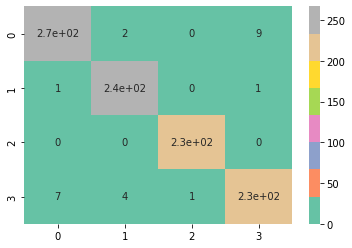

In [29]:
# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)
print(cm)
sns.heatmap(cm,
            annot=True,
            cmap="Set2")
plt.show()

In [30]:
def conMatrix(Matrix):
    metrics = pd.DataFrame(index =['Sensitivity', 'Specificity','Error','accuracy'],
                       columns =  ['EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL'])
    Map = 0   
    for i in range (0,len(cm)):
        TP = Matrix[i][i]
        FN = sum(Matrix[i])-TP #row 
        FP = sum(Matrix[:,i])-TP #col
        TN = sum(sum(Matrix))-TP-FN-FP

        accuracy = (TP+TN)/(TP+TN+FP+FN)
        error = 1-TP/sum(Matrix[i])
        sensitivity = TP/(TP+FN)
        specificity = TN/(TN+FP) 

        metrics.iloc[0][i] = round(sensitivity,4)
        metrics.iloc[1][i] = round(specificity,4)
        metrics.iloc[2][i] = round(error,4)
        metrics.iloc[3][i] = round(accuracy,4)
        Map += metrics.iloc[3][i] 
    print(metrics)
    print(Map/4)

In [31]:
conMatrix(cm)

            EOSINOPHIL LYMPHOCYTE MONOCYTE NEUTROPHIL
Sensitivity     0.9604     0.9918      1.0      0.951
Specificity     0.9888      0.992   0.9987     0.9866
Error           0.0396     0.0082      0.0      0.049
accuracy        0.9808     0.9919    0.999     0.9778
0.9873750000000001
